Import stuff I need

In [1]:
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


Upload into memory the data files. They are in parquet format.

In [2]:
table_sales = pq.read_table('../data/raw/modeldata.parquet')

In [3]:
table = pq.read_table('../data/raw/assmntdata.parquet')

table_sales includes data for homes in Cook County that have been sold in the past seven years. table includes data for all homes regardless of a sale. 

Convert to pandas dataframes.

In [4]:
df_sales = table_sales.to_pandas()

In [5]:
df = table.to_pandas()


examine columns

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346293 entries, 0 to 346292
Data columns (total 98 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   meta_pin                      346293 non-null  object  
 1   meta_year                     346293 non-null  float64 
 2   meta_class                    346293 non-null  object  
 3   meta_town_code                346293 non-null  object  
 4   meta_nbhd                     346293 non-null  object  
 5   meta_2yr_pri_board_est_bldg   345640 non-null  float64 
 6   meta_2yr_pri_board_est_land   345640 non-null  float64 
 7   meta_1yr_pri_board_est_bldg   346293 non-null  float64 
 8   meta_1yr_pri_board_est_land   346293 non-null  float64 
 9   meta_mailed_est_bldg          346293 non-null  float64 
 10  meta_mailed_est_land          346293 non-null  float64 
 11  meta_certified_est_bldg       346293 non-null  float64 
 12  meta_certified_est_land       

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098894 entries, 0 to 1098893
Data columns (total 95 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   meta_pin                      1098894 non-null  object  
 1   meta_year                     1098894 non-null  float64 
 2   meta_class                    1098894 non-null  object  
 3   meta_town_code                1098894 non-null  object  
 4   meta_nbhd                     1098894 non-null  object  
 5   meta_2yr_pri_board_est_bldg   1097104 non-null  float64 
 6   meta_2yr_pri_board_est_land   1097104 non-null  float64 
 7   meta_1yr_pri_board_est_bldg   1098894 non-null  float64 
 8   meta_1yr_pri_board_est_land   1098894 non-null  float64 
 9   meta_mailed_est_bldg          1098894 non-null  float64 
 10  meta_mailed_est_land          1098894 non-null  float64 
 11  meta_certified_est_bldg       1098894 non-null  float64 
 12  meta_certified

On-line documentation describes some but not all columns. 


df_sales columns should be the same as df except that df_sales also includes sales columns. Let's check.

In [8]:
df_sales_set = set(df_sales.columns)

In [9]:
df_set = set(df.columns)

In [10]:
print(df_sales_set.difference(df_set))

{'ind_arms_length', 'meta_deed_type', 'meta_document_num', 'meta_sale_price'}


In [11]:
print(df_set.difference(df_sales_set))

{'meta_num_288s_ended'}


meta_sales_price is the important column. For my simplified model I'll scrap the others.

Let's focus on homes for the same elementary school in Cook County. Alternatives, use median income as proxy for school ranking. The single district we will focus on is the Bell School district becuase it has a lot of bungaloes and mansions mixed together so it is a district where regression to the mean could be present in the County's model.

In [12]:
df['geo_school_elem_district'].unique()


array(['COMMUNITY UNIT SCHOOL DISTRICT 220', 'SCHOOL DISTRICT C C  15',
       'SCHOOL DISTRICT UNIT  300',
       'SCH DIST 21 WHEELING COMM CONSOLIDATED', 'SCHOOL DISTRICT 25',
       'SCHOOL DIST 23 PROSPECT HEIGHTS', 'SCHOOL DISTRICT  26',
       'SCHOOL DISTRICT  57', 'SCH DISTRICT 35', 'SCHOOL DISTRICT 28',
       'SCHOOL DISTRICT 27', 'SCHOOL DISTRICT 29', 'SCHOOL DISTRICT 30',
       'SCHOOL DISTRICT 31', 'SCHOOL DISTRICT C C 34',
       'SCHOOL DISTRICT 37', 'SCH DISTRICT 36', 'SCH DISTRICT 38',
       'SCH DISTRICT 39', 'SCHOOL DISTRICT C C  65', 'SCHOOL DISTRICT 46',
       'SCHOOL DISTRICT C C 54', 'SCHOOL DISTRICT C C  59',
       'SCHOOL DISTRICT C C  62', 'SCHOOL DISTRICT  63',
       'SCHOOL DISTRICT C C  64', 'EBINGER', 'EDISON PARK',
       'SCHOOL DISTRICT 68', 'SCHOOL DISTRICT 70', 'SCHOOL DISTRICT 67',
       'SCHOOL DISTRICT 71', 'SCHOOL DISTRICT 69',
       'SCHOOL DISTRICT 73 1/2', 'ROGERS', 'SCHOOL DISTRICT 73',
       'SCHOOL DISTRICT 74', 'SCHOOL DISTRICT 72'

In [13]:
df_bell = df[df['geo_school_elem_district']=='BELL']

In [14]:
df_bell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 383981 to 434486
Data columns (total 95 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   meta_pin                      1236 non-null   object  
 1   meta_year                     1236 non-null   float64 
 2   meta_class                    1236 non-null   object  
 3   meta_town_code                1236 non-null   object  
 4   meta_nbhd                     1236 non-null   object  
 5   meta_2yr_pri_board_est_bldg   1233 non-null   float64 
 6   meta_2yr_pri_board_est_land   1233 non-null   float64 
 7   meta_1yr_pri_board_est_bldg   1236 non-null   float64 
 8   meta_1yr_pri_board_est_land   1236 non-null   float64 
 9   meta_mailed_est_bldg          1236 non-null   float64 
 10  meta_mailed_est_land          1236 non-null   float64 
 11  meta_certified_est_bldg       1236 non-null   float64 
 12  meta_certified_est_land       1236 non-nu

In [15]:
df_bell_sales = df_sales[df_sales['geo_school_elem_district']=='BELL']

In [16]:
df_bell_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 126575 to 144028
Data columns (total 98 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   meta_pin                      508 non-null    object  
 1   meta_year                     508 non-null    float64 
 2   meta_class                    508 non-null    object  
 3   meta_town_code                508 non-null    object  
 4   meta_nbhd                     508 non-null    object  
 5   meta_2yr_pri_board_est_bldg   508 non-null    float64 
 6   meta_2yr_pri_board_est_land   508 non-null    float64 
 7   meta_1yr_pri_board_est_bldg   508 non-null    float64 
 8   meta_1yr_pri_board_est_land   508 non-null    float64 
 9   meta_mailed_est_bldg          508 non-null    float64 
 10  meta_mailed_est_land          508 non-null    float64 
 11  meta_certified_est_bldg       508 non-null    float64 
 12  meta_certified_est_land       508 non-null

The features I keep, in additon to the unque pin identifier for each property, as well as year and class of the property are the numeric ones rather than categories: land square footage, age, # rooms, #  bedrooms, # fireplaces, # full bathrooms, # half bathrooms, "ot_impr", "building square footage, logitude, and latitude. All of these are self explanatory except "ot_impr" which I might drop if I can't figure out from the documentation what it means. All of these features relate to the property except for the logitude and latitude, which relate to location. Prof Nick Tideman, an economics professor at Virgina Tech, whose research is on land values tells me that the proper way to model this system is to model land values seperately from building values and then add them together. To do this I would have to seperatly identify those properties that are flipped, and assume they are sold at their land value alone. But for my first attempt at this, I will model the land plus property as a single price which is what Cook County does. 

In [17]:
df_bell_gf = df_bell.iloc[:,[0,1,2,21,22,26,27,33,35,36,45,46,74,75]]


In [18]:
df_bell_gf.head()

,meta_pin,meta_year,meta_class,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_ot_impr,char_bldg_sf,geo_longitude,geo_latitude
383981,13242020150000,2020.0,278,3129.0,25.0,10.0,3.0,2.0,3.0,1.0,0.0,2166.0,-87.690749,41.953322
383982,13242020160000,2020.0,203,3050.0,127.0,4.0,3.0,0.0,1.0,0.0,0.0,1077.0,-87.690657,41.953323
383983,13242020170000,2020.0,278,3050.0,21.0,8.0,4.0,0.0,2.0,1.0,0.0,2340.0,-87.690565,41.953323
383984,13242020180000,2020.0,278,3050.0,9.0,9.0,4.0,2.0,3.0,1.0,0.0,2639.0,-87.690473,41.953324
383985,13242020190000,2020.0,211,2928.0,94.0,6.0,4.0,0.0,2.0,0.0,0.0,2456.0,-87.690381,41.953324


In [19]:
df_bell_sales_gf = df_bell_sales.iloc[:,[0,1,2,19,23,24,28,29,35,37,38,47,48,76,77]]

In [20]:
df_bell_sales_gf.head()

,meta_pin,meta_year,meta_class,meta_sale_price,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_ot_impr,char_bldg_sf,geo_longitude,geo_latitude
126575,13242020170000,2017.0,278,850000.0,3050.0,18.0,8.0,4.0,0.0,2.0,1.0,0.0,2340.0,-87.690565,41.953323
126576,13242020180000,2013.0,278,1055000.0,3050.0,2.0,9.0,4.0,3.0,3.0,1.0,0.0,2639.0,-87.690473,41.953324
126577,13242020220000,2013.0,211,875000.0,3050.0,93.0,9.0,5.0,0.0,2.0,1.0,0.0,2622.0,-87.690105,41.953326
126578,13242030020000,2013.0,203,330000.0,3137.0,54.0,6.0,3.0,0.0,2.0,0.0,0.0,1020.0,-87.690731,41.952804
126579,13242030040000,2014.0,202,300000.0,3050.0,116.0,4.0,2.0,0.0,2.0,0.0,0.0,680.0,-87.690547,41.952805


In [21]:
df_bell_gf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 383981 to 434486
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   meta_pin       1236 non-null   object 
 1   meta_year      1236 non-null   float64
 2   meta_class     1236 non-null   object 
 3   char_hd_sf     1236 non-null   float64
 4   char_age       1236 non-null   float64
 5   char_rooms     1236 non-null   float64
 6   char_beds      1236 non-null   float64
 7   char_frpl      1236 non-null   float64
 8   char_fbath     1236 non-null   float64
 9   char_hbath     1236 non-null   float64
 10  char_ot_impr   1236 non-null   float64
 11  char_bldg_sf   1236 non-null   float64
 12  geo_longitude  1236 non-null   float64
 13  geo_latitude   1236 non-null   float64
dtypes: float64(12), object(2)
memory usage: 144.8+ KB


In [22]:
df_bell_sales_gf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 126575 to 144028
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meta_pin         508 non-null    object 
 1   meta_year        508 non-null    float64
 2   meta_class       508 non-null    object 
 3   meta_sale_price  508 non-null    float64
 4   char_hd_sf       508 non-null    float64
 5   char_age         508 non-null    float64
 6   char_rooms       508 non-null    float64
 7   char_beds        508 non-null    float64
 8   char_frpl        507 non-null    float64
 9   char_fbath       508 non-null    float64
 10  char_hbath       508 non-null    float64
 11  char_ot_impr     508 non-null    float64
 12  char_bldg_sf     508 non-null    float64
 13  geo_longitude    508 non-null    float64
 14  geo_latitude     508 non-null    float64
dtypes: float64(13), object(2)
memory usage: 63.5+ KB


All values are non-null expect for 1 entry in # fireplaces. But it is only missing in the sales file. I should be able fill this in from the other file. In fact, the feature values in the sales file should be identical for the same property id's in the main file. Privided the property hasn't flipped. Let check this for 1 pin.

In [23]:
df_bell_gf[df_bell_gf.meta_pin=='13242020170000'].T

,383983
meta_pin,13242020170000
meta_year,2020.0
meta_class,278
char_hd_sf,3050.0
char_age,21.0
char_rooms,8.0
char_beds,4.0
char_frpl,0.0
char_fbath,2.0
char_hbath,1.0


In [24]:
df_bell_sales_gf[df_bell_sales_gf.meta_pin=='13242020170000'].T

,126575
meta_pin,13242020170000
meta_year,2017.0
meta_class,278
meta_sale_price,850000.0
char_hd_sf,3050.0
char_age,18.0
char_rooms,8.0
char_beds,4.0
char_frpl,0.0
char_fbath,2.0


The year (presumably of the data) and the age is different but consistant with each other. The same pin can have differnet years which should effect the age of the property only. Except that if a house is sold and flipped then then other property feautures should change too.

Just to verify that all values are present:



In [25]:
missing = pd.concat([df_bell_gf.isnull().sum(), 100 * df_bell_gf.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)


,count,%
meta_pin,0,0.0
meta_year,0,0.0
meta_class,0,0.0
char_hd_sf,0,0.0
char_age,0,0.0
char_rooms,0,0.0
char_beds,0,0.0
char_frpl,0,0.0
char_fbath,0,0.0
char_hbath,0,0.0


check that each pin number in the two files is unique


In [26]:
df_bell_gf['meta_pin'].value_counts().head()

14192020110000    2
14191050190000    2
14191240230000    2
14192170310000    2
14191140330000    1
Name: meta_pin, dtype: int64

We have four duplicates. Lets look at them.


In [27]:
df_bell_gf[df_bell_gf['meta_pin']=='14191240230000']

,meta_pin,meta_year,meta_class,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_ot_impr,char_bldg_sf,geo_longitude,geo_latitude
433251,14191240230000,2020.0,211,5580.0,95.0,12.0,6.0,0.0,3.0,0.0,0.0,3264.0,-87.687428,41.947584
433252,14191240230000,2020.0,211,5580.0,71.0,3.0,1.0,0.0,2.0,0.0,0.0,650.0,-87.687428,41.947584


In [28]:
df_bell_gf[df_bell_gf['meta_pin']=='14192020110000']

,meta_pin,meta_year,meta_class,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_ot_impr,char_bldg_sf,geo_longitude,geo_latitude
433535,14192020110000,2020.0,212,3825.0,33.0,10.0,4.0,2.0,2.0,0.0,0.0,2722.0,-87.678115,41.952618
433536,14192020110000,2020.0,212,3825.0,112.0,10.0,4.0,0.0,2.0,0.0,0.0,3018.0,-87.678115,41.952618


In [29]:
df_bell_gf[df_bell_gf['meta_pin']=='14191050190000']

,meta_pin,meta_year,meta_class,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_ot_impr,char_bldg_sf,geo_longitude,geo_latitude
432671,14191050190000,2020.0,211,5019.0,112.0,18.0,9.0,0.0,3.0,0.0,0.0,3271.0,-87.682,41.952434
432672,14191050190000,2020.0,211,5019.0,112.0,12.0,4.0,0.0,2.0,0.0,0.0,2812.0,-87.682,41.952434


In [30]:
df_bell_gf[df_bell_gf['meta_pin']=='14192170310000']

,meta_pin,meta_year,meta_class,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_ot_impr,char_bldg_sf,geo_longitude,geo_latitude
433967,14192170310000,2020.0,211,3780.0,116.0,17.0,6.0,0.0,5.0,0.0,0.0,4059.0,-87.677392,41.949878
433968,14192170310000,2020.0,211,3780.0,116.0,5.0,3.0,0.0,1.0,0.0,0.0,1147.0,-87.677392,41.949878


It is not clear what is going on here. Let's check the sales file.

In [31]:
df_bell_sales_gf['meta_pin'].value_counts().head(100)

14191100030000    3
13242080030000    3
13242080290000    3
14193010330000    3
13242080060000    3
                 ..
14191160260000    2
14191120350000    1
14192180250000    1
14193020080000    1
14191180390000    1
Name: meta_pin, Length: 100, dtype: int64

It makes sense that there should be lots of duplicates in the sales file since properties are sold many times. Let's take a look at a few.


In [32]:
df_bell_sales_gf[df_bell_sales_gf['meta_pin']=='14191050270000']


,meta_pin,meta_year,meta_class,meta_sale_price,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_ot_impr,char_bldg_sf,geo_longitude,geo_latitude
143253,14191050270000,2014.0,211,675000.0,3720.0,106.0,16.0,6.0,0.0,3.0,0.0,0.0,3396.0,-87.681499,41.952957
143254,14191050270000,2015.0,278,1975000.0,3720.0,1.0,8.0,4.0,2.0,4.0,2.0,0.0,3168.0,-87.681499,41.952957
143255,14191050270000,2018.0,278,1750000.0,3720.0,4.0,8.0,4.0,2.0,4.0,2.0,0.0,3168.0,-87.681499,41.952957


This tells a story that I partially understand. The property was sold in 2014. The old house was torn down and a new house built in its place or the old house was significantly renovated. The new property was then sold in 2015. This explains the drop in age from 106 to 1. The property was sold again in 2018. the features are the same in 2015 and 2018. Between 2014 and 2015 the feautures changed, consistant with the flipping scenerio. However the feauture changes are weird. the totakl number of rooms and the total number of bed rooms goes down and but the number of full and half bathrooms go up.  Also, the building square footage goes down. Despit an enormous change in price.Clearly the data is not accurate. Let's try another.


In [33]:
df_bell_sales_gf[df_bell_sales_gf['meta_pin']=='13242080030000']

,meta_pin,meta_year,meta_class,meta_sale_price,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_ot_impr,char_bldg_sf,geo_longitude,geo_latitude
126617,13242080030000,2014.0,203,400000.0,3720.0,56.0,6.0,3.0,0.0,1.0,0.0,0.0,1395.0,-87.690395,41.948234
126618,13242080030000,2015.0,278,1100000.0,3720.0,1.0,7.0,4.0,1.0,3.0,1.0,0.0,2377.0,-87.690395,41.948234
126619,13242080030000,2019.0,278,1185000.0,3720.0,5.0,7.0,4.0,1.0,3.0,1.0,0.0,2377.0,-87.690395,41.948234


This is consistant with a flip. The age goes down to 1 the price goes way up and the features change. This time all the features change in the right direction. Now I confirm that pins are unique if I suppliment them by year and class.


In [34]:
(df_bell_sales_gf['meta_pin'] + ', ' + df_bell_sales_gf['meta_year'].astype('str')+ ', ' + df_bell_sales_gf['meta_class']).value_counts().head()


13242080370000, 2019.0, 278    1
14191160260000, 2019.0, 211    1
13242120120000, 2020.0, 278    1
14191120120000, 2020.0, 206    1
14191110120000, 2014.0, 211    1
dtype: int64

What is ot_impr?

In [35]:
df_bell_sales_gf['char_ot_impr'].value_counts()

0.0    508
Name: char_ot_impr, dtype: int64

It means nothing. I can drop it.

In [36]:
df_bell_sales_gf.nunique()

meta_pin           400
meta_year            8
meta_class          10
meta_sale_price    308
char_hd_sf          85
char_age            68
char_rooms          19
char_beds           12
char_frpl            4
char_fbath           7
char_hbath           5
char_ot_impr         1
char_bldg_sf       356
geo_longitude      400
geo_latitude       400
dtype: int64

In [37]:
df_bell_gf.nunique()

meta_pin         1232
meta_year           1
meta_class         12
char_hd_sf        189
char_age           61
char_rooms         24
char_beds          13
char_frpl           6
char_fbath          8
char_hbath          5
char_ot_impr        5
char_bldg_sf      756
geo_longitude    1232
geo_latitude     1232
dtype: int64

All other catergories, besides ot_impr convey some information, except that the year in the main file is set to 2020 for every property. The main file also includes more property classes. Just for fun I'll look at value counts for the property classes in a bar graph.


<AxesSubplot:title={'center':'Counts of Classes'}, ylabel='Class'>

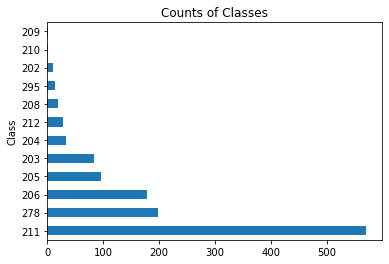

In [38]:

df_bell_gf.meta_class.value_counts().plot(kind='barh', title="Counts of Classes", xlabel="Class")



<AxesSubplot:title={'center':'Counts of Classes'}, ylabel='Class'>

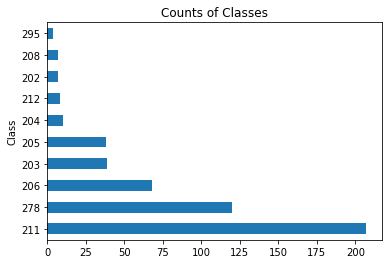

In [39]:
df_bell_sales_gf.meta_class.value_counts().plot(kind='barh', title="Counts of Classes", xlabel="Class")

There are some classes that are different in each file. Is the class a feature worth keeping or is all the class information included in the building square footage, age, and land square footage? Let's check.

In [40]:
df_bell_sales_gf.groupby('meta_class')[['char_bldg_sf','char_hd_sf','char_age']].mean()

,char_bldg_sf,char_hd_sf,char_age
meta_class,,,
202,873.857143,3792.142857,107.000000
203,1352.410256,3753.384615,86.871795
204,2050.500000,3741.700000,102.700000
205,1831.684211,3592.631579,110.921053
206,2775.676471,3778.132353,108.338235
208,4166.000000,4164.142857,7.285714
211,2604.130435,3665.497585,105.531401
212,5260.750000,4180.500000,102.375000
278,2921.325000,3742.691667,7.850000


In [41]:
df_bell_gf.groupby('meta_class')[['char_bldg_sf','char_hd_sf','char_age']].mean()


,char_bldg_sf,char_hd_sf,char_age
meta_class,,,
202,901.400000,3572.600000,106.000000
203,1337.023810,3756.738095,99.357143
204,2019.352941,3889.500000,102.029412
205,1793.552083,3655.895833,114.989583
206,2764.213483,3807.213483,111.202247
208,4279.684211,4223.947368,8.526316
209,5685.000000,3624.000000,108.000000
210,2587.000000,2781.500000,91.000000
211,2812.092820,3757.579685,107.663748


The data is constant with the definitions of these classes. 202-204 are single story with increasing minimum building square footage. 205-206 are two or more stories and older than 62 years. 207-278-208 are two or more story and less than or equal to 62 years with increasing building square footage. They are out of numerical order. 211 are apartmment buildings with 2-6 appartments. I think this must include condos and 2 and 3 flats. They are a dominant older property in the district. 212 is mixed use residential and comerical with comercial on the ground floor. 2-34 is split level with lower level below ground. 295 is townhome or row house. Will need to study distribution in each class to see if classes can be dropped as the data is represented by the features. As no feauture represents number of stories, I might need to retain this if I decide that this is important. 


In [42]:
df_bell_gf.describe().T

,count,mean,std,min,25%,50%,75%,max
meta_year,1236.0,2020.000000,0.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000
char_hd_sf,1236.0,3746.521036,574.693423,1025.000000,3720.000000,3720.000000,3750.000000,8067.000000
char_age,1236.0,90.006472,39.729062,3.000000,95.000000,107.000000,113.000000,132.000000
char_rooms,1236.0,10.274272,3.945378,3.000000,8.000000,10.000000,12.000000,46.000000
char_beds,1236.0,4.736246,1.696392,1.000000,4.000000,4.000000,6.000000,24.000000
char_frpl,1236.0,0.317961,0.677003,0.000000,0.000000,0.000000,0.000000,6.000000
char_fbath,1236.0,2.416667,1.022982,1.000000,2.000000,2.000000,3.000000,10.000000
char_hbath,1236.0,0.423139,0.612751,0.000000,0.000000,0.000000,1.000000,6.000000
char_ot_impr,1236.0,0.267799,5.407474,0.000000,0.000000,0.000000,0.000000,135.000000
char_bldg_sf,1236.0,2665.279126,1046.235918,549.000000,2160.000000,2544.000000,3033.500000,11508.000000


In [43]:
df_bell_sales_gf.describe().T

,count,mean,std,min,25%,50%,75%,max
meta_year,508.0,2016.187008,2.280712,2013.000000,2014.000000,2016.000000,2.018000e+03,2.020000e+03
meta_sale_price,508.0,980953.017717,418958.931134,150000.000000,676000.000000,872500.000000,1.215625e+06,2.365000e+06
char_hd_sf,508.0,3701.539370,514.129567,1200.000000,3697.500000,3720.000000,3.750000e+03,7.661000e+03
char_age,508.0,79.649606,44.460421,1.000000,18.000000,103.000000,1.110000e+02,1.270000e+02
char_rooms,508.0,9.750000,3.520929,0.000000,8.000000,10.000000,1.100000e+01,4.200000e+01
char_beds,508.0,4.545276,1.647399,0.000000,4.000000,4.000000,5.000000e+00,2.400000e+01
char_frpl,507.0,0.386588,0.757347,0.000000,0.000000,0.000000,0.000000e+00,3.000000e+00
char_fbath,508.0,2.381890,0.907902,0.000000,2.000000,2.000000,3.000000e+00,6.000000e+00
char_hbath,508.0,0.486220,0.660081,0.000000,0.000000,0.000000,1.000000e+00,6.000000e+00
char_ot_impr,508.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00


Will need to check some of these. The maximums for the main file seem to be errors: 46 rooms, 24 bed rooms, 6 fireplaces, 10 bathroom, 6 half baths. These are supposed to be individual residendences. Some of the maximums for the sales file are equally outlandish: 42 rooms, 24 bedrooms, 6 bathrooms, 6 half baths. 

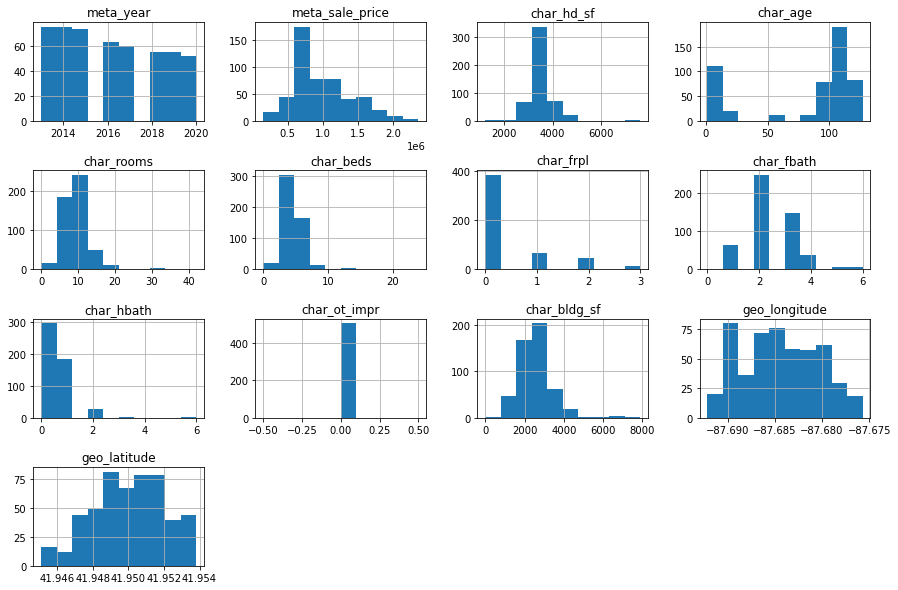

In [44]:
df_bell_sales_gf.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

There appear to be gap years in the sales data. There is only slight evidence for a bimodal sales distribution from slight dip less than 1.5 million. But the age is clearly bimodal. There appear to be outliers in hd_sf, rooms, beds, half baths, and bld_sf, 

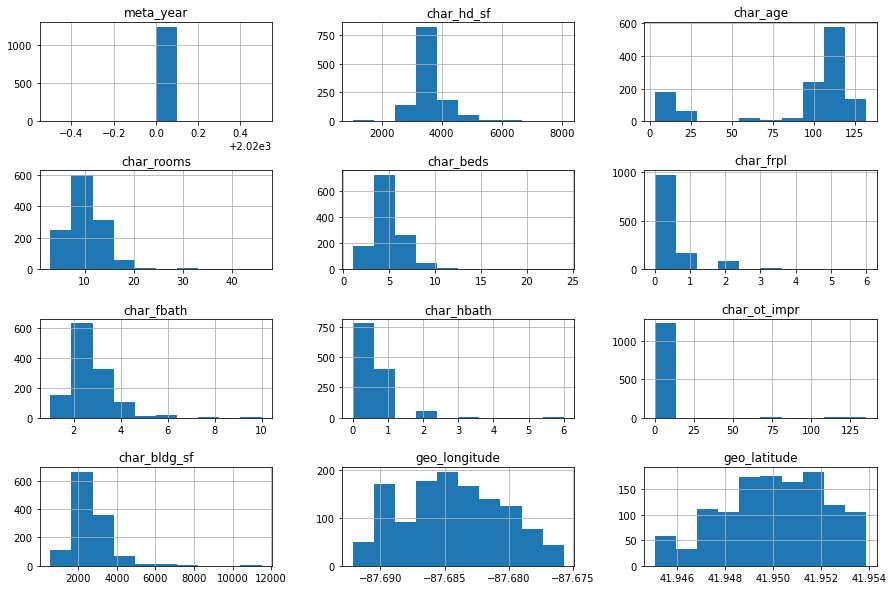

In [45]:
df_bell_gf.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

outliers in rooms, fbaths, hbaths, ot_impr, and bldg_sf

In [46]:
df_bell_sales_gf[df_bell_sales_gf.char_rooms >= 20].T

,143243,143244,143256,143333,143394,143852
meta_pin,14191040180000,14191040180000,14191050320000,14191100400000,14191140290000,14192190090000
meta_year,2014.0,2016.0,2018.0,2014.0,2016.0,2020.0
meta_class,211,211,211,211,211,211
meta_sale_price,875000.0,900000.0,1550000.0,1510000.0,1200000.0,1020000.0
char_hd_sf,5012.0,5012.0,5025.0,3624.0,6921.0,2480.0
char_age,101.0,103.0,105.0,101.0,108.0,102.0
char_rooms,20.0,20.0,42.0,30.0,30.0,30.0
char_beds,8.0,8.0,24.0,12.0,12.0,12.0
char_frpl,0.0,0.0,0.0,0.0,0.0,0.0
char_fbath,4.0,4.0,6.0,6.0,6.0,6.0


In [47]:
df_bell_gf[df_bell_gf.char_rooms > 21].T

,384198,384199,384200,384201,384202,432685,432901,432930,432964,432970,432983,433036,433135,433207,433286,433323,433361,433725,434015,434020
meta_pin,13242130170000,13242130180000,13242130190000,13242130200000,13242130210000,14191050320000,14191120370000,14191130300000,14191140290000,14191140350000,14191150190000,14191180210000,14191210010000,14191220490000,14191250310000,14191260310000,14191270310000,14192090090000,14192180380000,14192190090000
meta_year,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0
meta_class,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211
char_hd_sf,5418.0,6042.0,6041.0,6041.0,6040.0,5025.0,3509.0,6050.0,6921.0,6913.0,7192.0,3620.0,4687.0,3304.0,3375.0,3377.0,3377.0,4140.0,2691.0,2480.0
char_age,6.0,6.0,3.0,3.0,3.0,107.0,103.0,111.0,112.0,113.0,112.0,104.0,117.0,114.0,102.0,107.0,107.0,104.0,117.0,102.0
char_rooms,46.0,46.0,28.0,28.0,28.0,42.0,24.0,30.0,27.0,30.0,24.0,24.0,30.0,24.0,30.0,30.0,27.0,24.0,30.0,30.0
char_beds,14.0,14.0,14.0,14.0,14.0,24.0,12.0,12.0,12.0,12.0,6.0,6.0,12.0,8.0,12.0,12.0,9.0,12.0,12.0,12.0
char_frpl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
char_fbath,8.0,8.0,10.0,10.0,10.0,6.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0
char_hbath,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


All of the ones with huge numbers of rooms are in class 211 which is "Apartment building with 2 to 6 units, any age" It looks like the building is being treated as a whole. In any case, it is sufficiently different than a single residece that I should not inlcude class 211. Here's how it looks with them.

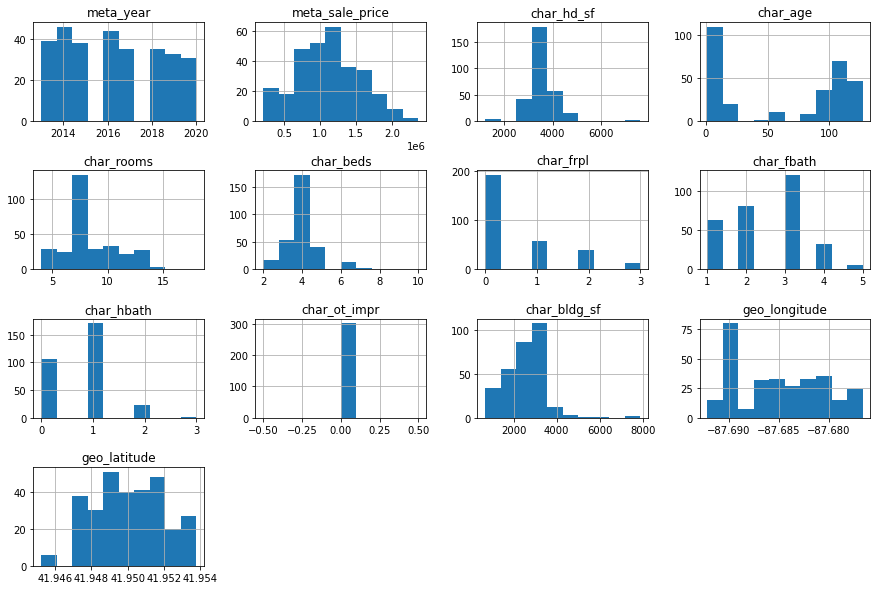

In [48]:
df_bell_sales_gf[df_bell_sales_gf.meta_class != '211'].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

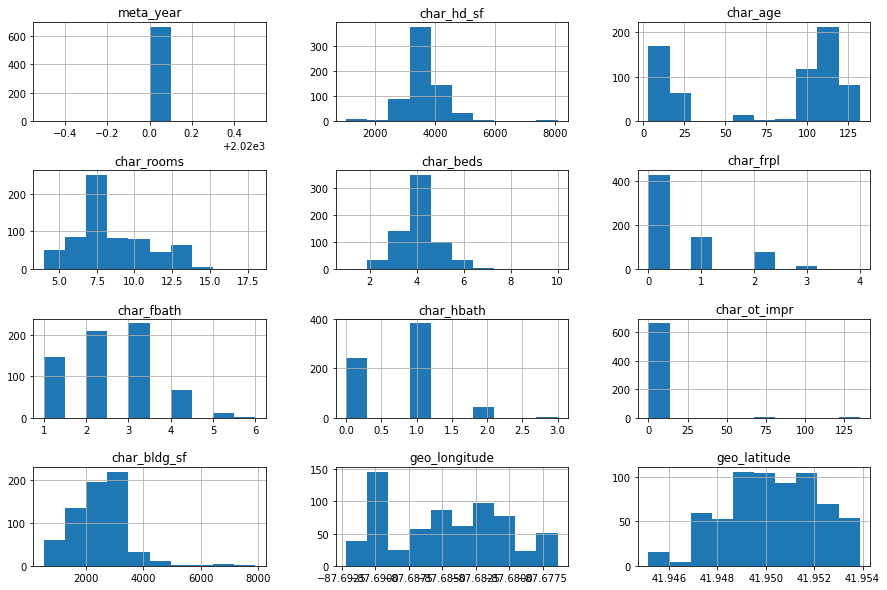

In [49]:
df_bell_gf[df_bell_gf.meta_class != '211'].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Let's check out the remaining outlier 

In [50]:
df_bell_sales_gf[(df_bell_sales_gf.meta_class != '211') & (df_bell_sales_gf.char_hd_sf > 6000)].T

,143227,143384
meta_pin,14191020010000,14191140140000
meta_year,2016.0,2019.0
meta_class,212,206
meta_sale_price,1300000.0,1640000.0
char_hd_sf,7140.0,7661.0
char_age,106.0,117.0
char_rooms,13.0,8.0
char_beds,6.0,5.0
char_frpl,0.0,2.0
char_fbath,3.0,2.0


In [51]:
df_bell_gf[(df_bell_gf.meta_class != '211') & (df_bell_gf.char_hd_sf > 6000)].T

,432623,432935,432936,432949,433208,433775
meta_pin,14191040020000,14191130360000,14191130390000,14191140140000,14191230010000,14192110290000
meta_year,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0
meta_class,212,206,206,206,208,212
char_hd_sf,6250.0,6921.0,8067.0,7661.0,7505.0,6250.0
char_age,107.0,110.0,122.0,118.0,6.0,109.0
char_rooms,16.0,10.0,10.0,8.0,10.0,5.0
char_beds,8.0,4.0,5.0,5.0,5.0,2.0
char_frpl,0.0,1.0,2.0,2.0,2.0,0.0
char_fbath,4.0,3.0,4.0,2.0,4.0,2.0
char_hbath,2.0,0.0,1.0,2.0,2.0,2.0


Aside from one entry, these are old buildings. In some cases wealthy people have bought to adjacent properties and tore down one to use the land as a yard for the other. I wonder if this explains the huge land sf and smaller bldg sqwuare footage for some entries. Or they could be errors in entry.

In [52]:
df_bell_sales_gf[(df_bell_sales_gf.meta_class != '211') & (df_bell_sales_gf.char_bldg_sf > 6000)].T

,143227,143285,143637
meta_pin,14191020010000,14191080140000,14192020020000
meta_year,2016.0,2013.0,2013.0
meta_class,212,212,212
meta_sale_price,1300000.0,450000.0,1017000.0
char_hd_sf,7140.0,3210.0,4550.0
char_age,106.0,82.0,103.0
char_rooms,13.0,11.0,10.0
char_beds,6.0,8.0,3.0
char_frpl,0.0,0.0,0.0
char_fbath,3.0,5.0,2.0


In [53]:
df_bell_gf[(df_bell_gf.meta_class != '211') & (df_bell_gf.char_bldg_sf > 6000)].T

,432656,432657,432686,432733,433531,433775,433944,433988
meta_pin,14191050020000,14191050030000,14191050330000,14191080140000,14192020020000,14192110290000,14192170010000,14192180090000
meta_year,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0
meta_class,212,212,212,212,212,212,212,212
char_hd_sf,3750.0,3750.0,5915.0,3210.0,4550.0,6250.0,4140.0,4402.0
char_age,104.0,109.0,6.0,89.0,110.0,109.0,109.0,117.0
char_rooms,9.0,5.0,12.0,11.0,10.0,5.0,9.0,12.0
char_beds,6.0,2.0,6.0,8.0,3.0,2.0,6.0,6.0
char_frpl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
char_fbath,5.0,3.0,4.0,5.0,2.0,2.0,4.0,6.0
char_hbath,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0


All of these are class 212 "Mixed-use commercial/residential building with apartment and commercial area totaling 6 units or less with a square foot area less than 20,000 square feet, any age" and should be removed.

In [54]:
bell = df_bell_gf[(df_bell_gf.meta_class != '211') & (df_bell_gf.meta_class != '212')]

In [55]:
bell_sales = df_bell_sales_gf[(df_bell_sales_gf.meta_class != '211') & (df_bell_sales_gf.meta_class != '212')]

In [56]:
bell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 383981 to 434485
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   meta_pin       637 non-null    object 
 1   meta_year      637 non-null    float64
 2   meta_class     637 non-null    object 
 3   char_hd_sf     637 non-null    float64
 4   char_age       637 non-null    float64
 5   char_rooms     637 non-null    float64
 6   char_beds      637 non-null    float64
 7   char_frpl      637 non-null    float64
 8   char_fbath     637 non-null    float64
 9   char_hbath     637 non-null    float64
 10  char_ot_impr   637 non-null    float64
 11  char_bldg_sf   637 non-null    float64
 12  geo_longitude  637 non-null    float64
 13  geo_latitude   637 non-null    float64
dtypes: float64(12), object(2)
memory usage: 74.6+ KB


In [57]:
bell_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 126575 to 144026
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meta_pin         293 non-null    object 
 1   meta_year        293 non-null    float64
 2   meta_class       293 non-null    object 
 3   meta_sale_price  293 non-null    float64
 4   char_hd_sf       293 non-null    float64
 5   char_age         293 non-null    float64
 6   char_rooms       293 non-null    float64
 7   char_beds        293 non-null    float64
 8   char_frpl        293 non-null    float64
 9   char_fbath       293 non-null    float64
 10  char_hbath       293 non-null    float64
 11  char_ot_impr     293 non-null    float64
 12  char_bldg_sf     293 non-null    float64
 13  geo_longitude    293 non-null    float64
 14  geo_latitude     293 non-null    float64
dtypes: float64(13), object(2)
memory usage: 36.6+ KB


637 single family residences and 293 sales prices to work with.

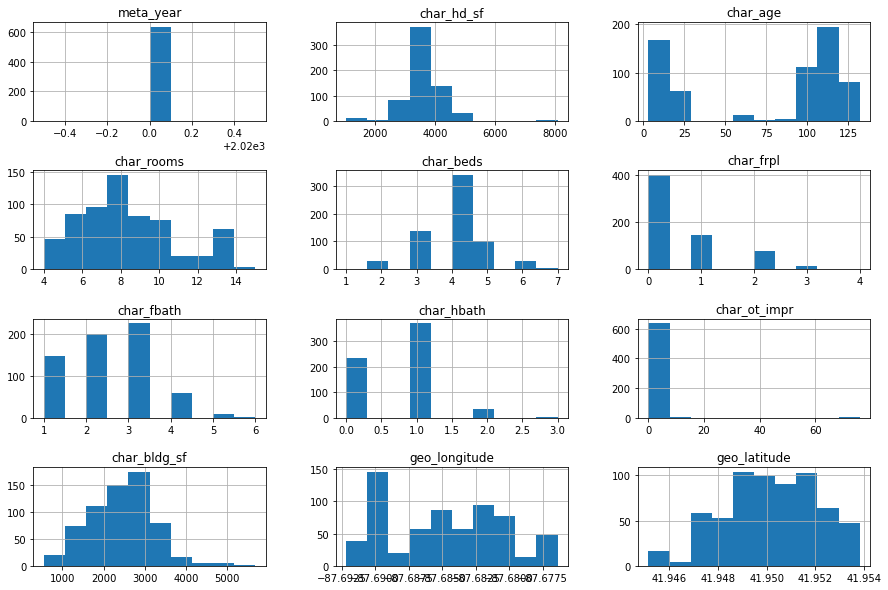

In [58]:
bell.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

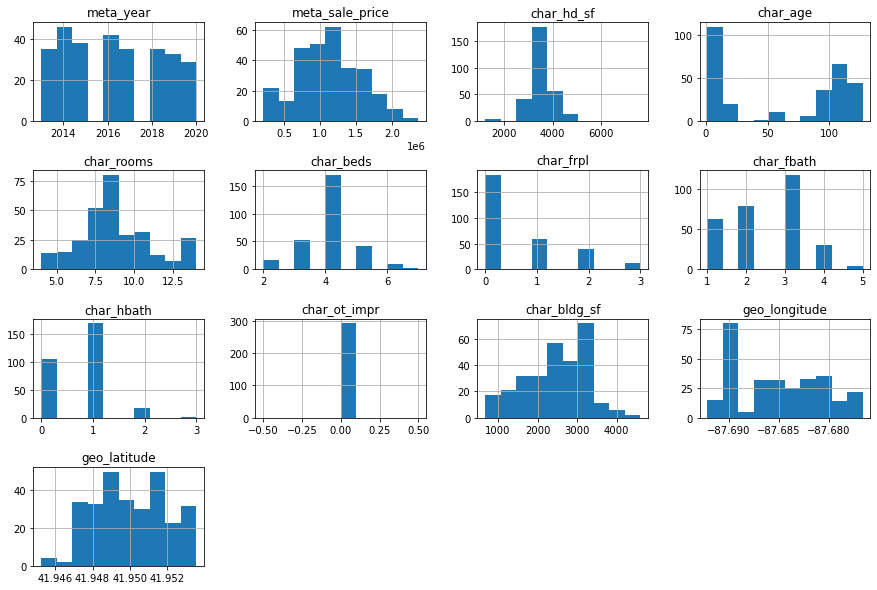

In [59]:
bell_sales.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

A possible bimodel distribution in price is a little more visible now. Let's check out ot_impr.


In [60]:
bell[bell.char_ot_impr > 0].T

,432698,432993
meta_pin,14191060160000,14191150350000
meta_year,2020.0,2020.0
meta_class,205,204
char_hd_sf,3720.0,4960.0
char_age,122.0,117.0
char_rooms,6.0,8.0
char_beds,3.0,3.0
char_frpl,0.0,1.0
char_fbath,1.0,1.0
char_hbath,1.0,1.0


Can't tell what it is but because there is no info in sales data it is useless to keep.

In [61]:
bell = bell.drop(columns = 'char_ot_impr')

In [62]:
bell_sales= bell_sales.drop(columns = 'char_ot_impr')

In [63]:
bell.head()


,meta_pin,meta_year,meta_class,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_bldg_sf,geo_longitude,geo_latitude
383981,13242020150000,2020.0,278,3129.0,25.0,10.0,3.0,2.0,3.0,1.0,2166.0,-87.690749,41.953322
383982,13242020160000,2020.0,203,3050.0,127.0,4.0,3.0,0.0,1.0,0.0,1077.0,-87.690657,41.953323
383983,13242020170000,2020.0,278,3050.0,21.0,8.0,4.0,0.0,2.0,1.0,2340.0,-87.690565,41.953323
383984,13242020180000,2020.0,278,3050.0,9.0,9.0,4.0,2.0,3.0,1.0,2639.0,-87.690473,41.953324
383987,13242020210000,2020.0,206,3050.0,96.0,7.0,3.0,0.0,2.0,1.0,2350.0,-87.690197,41.953325


In [64]:
bell_sales.head()

,meta_pin,meta_year,meta_class,meta_sale_price,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_bldg_sf,geo_longitude,geo_latitude
126575,13242020170000,2017.0,278,850000.0,3050.0,18.0,8.0,4.0,0.0,2.0,1.0,2340.0,-87.690565,41.953323
126576,13242020180000,2013.0,278,1055000.0,3050.0,2.0,9.0,4.0,3.0,3.0,1.0,2639.0,-87.690473,41.953324
126578,13242030020000,2013.0,203,330000.0,3137.0,54.0,6.0,3.0,0.0,2.0,0.0,1020.0,-87.690731,41.952804
126579,13242030040000,2014.0,202,300000.0,3050.0,116.0,4.0,2.0,0.0,2.0,0.0,680.0,-87.690547,41.952805
126580,13242030110000,2018.0,206,976711.0,3660.0,96.0,7.0,4.0,1.0,2.0,1.0,2778.0,-87.689729,41.952810


In [66]:
bell.to_csv('../data/bell_cleaned.csv')

In [67]:
bell_sales.to_csv('../data/bell_sales_cleaned.csv')

I have saved single family home data in the Bell district. I have retained numerical features plus class.